In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [16,8]

print("Using Tensorflow version:", tf.__version__)

Using Tensorflow version: 2.0.0


In [24]:
AUTO = tf.data.experimental.AUTOTUNE
EPOCHS = 27
GCS_DS_PATH = "C:\\Users\\Faris\\Documents\\prodDetectionShopee\\train\\train"

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [5]:
train_df.shape, test_df.shape

((105392, 2), (12186, 2))

In [6]:
train_df.head()

filename  category
0  45e2d0c97f7bdf8cbf3594beb6fdcda0.jpg         3
1  f74d1a5fc2498bbbfa045c74e3cc333e.jpg         3
2  f6c172096818c5fab10ecae722840798.jpg         3
3  251ffd610399ac00fea7709c642676ee.jpg         3
4  73c7328b8eda399199fdedec6e4badaf.jpg         3

In [8]:
def show_train_img(category):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(24,10))
    train_path = "C:\\Users\\Faris\\Documents\\prodDetectionShopee\\train\\train"
    ten_random_samples = pd.Series(os.listdir(os.path.join(train_path,category))).sample(10).values
    
    for idx, image in enumerate(ten_random_samples):
        final_path = os.path.join(train_path, category, image)
        img = cv2.imread(final_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axes.ravel()[idx].imshow(img)
        axes.ravel()[idx].axis('off')
    plt.tight_layout()

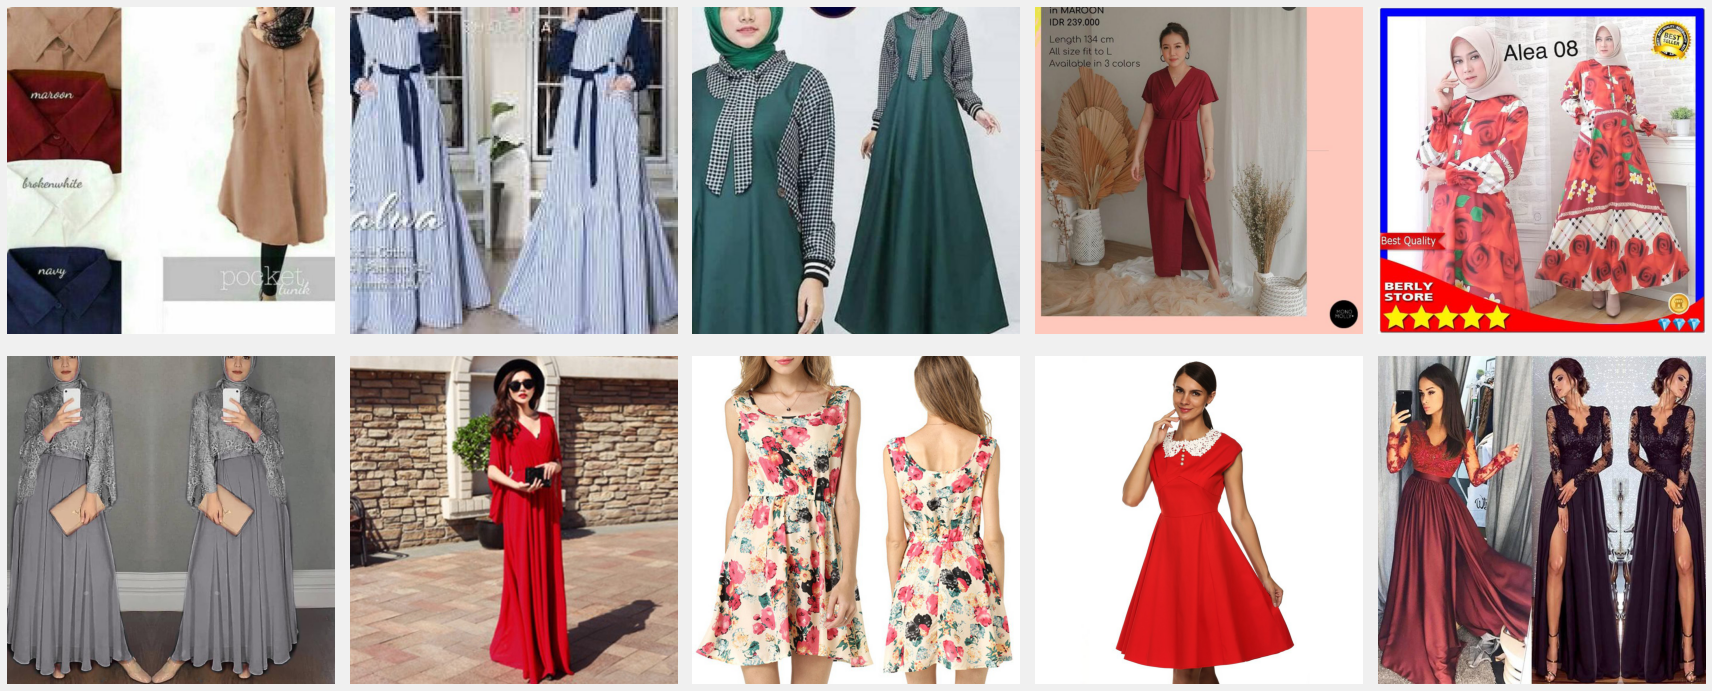

In [9]:
show_train_img("01")

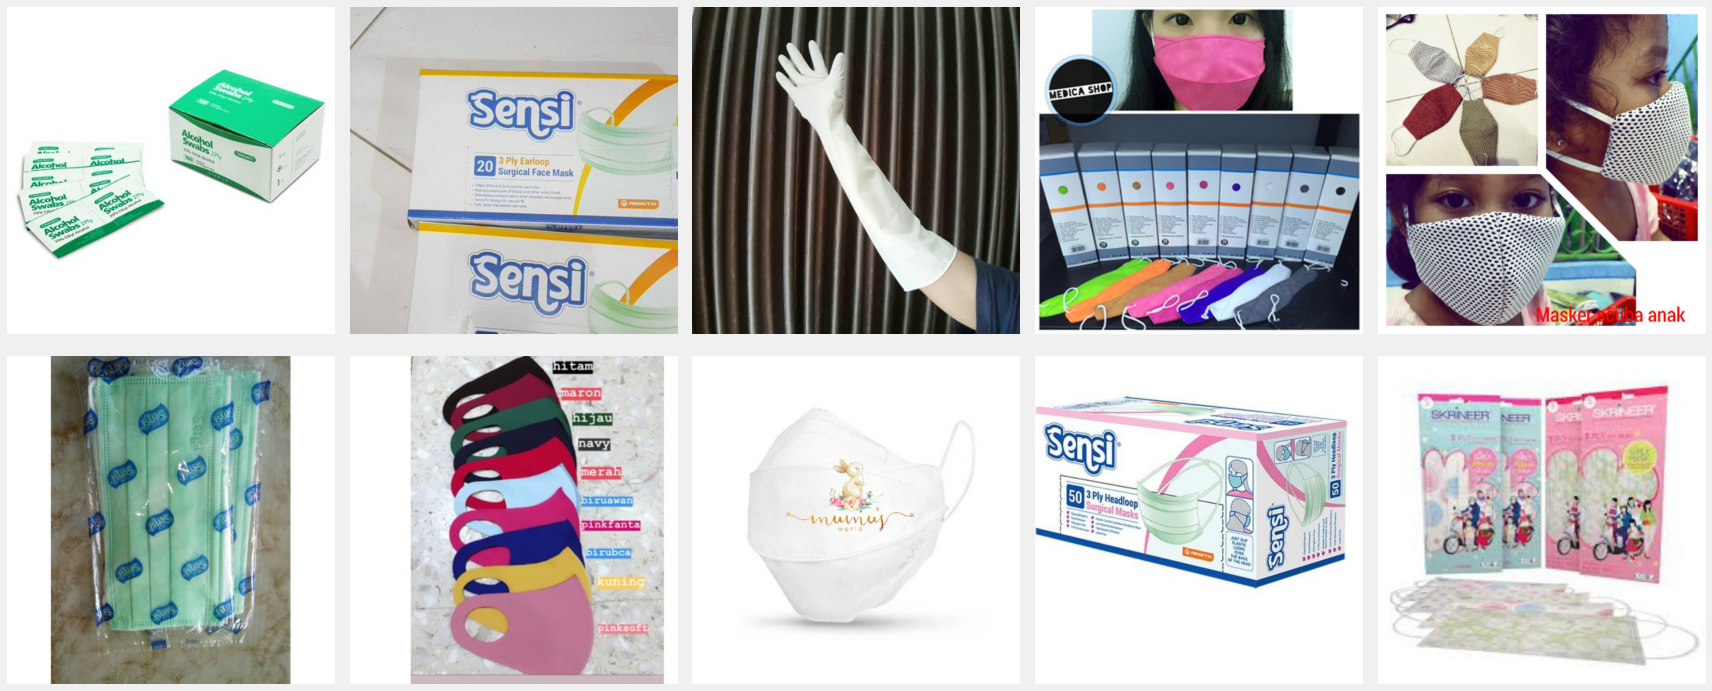

In [10]:
show_train_img("32")

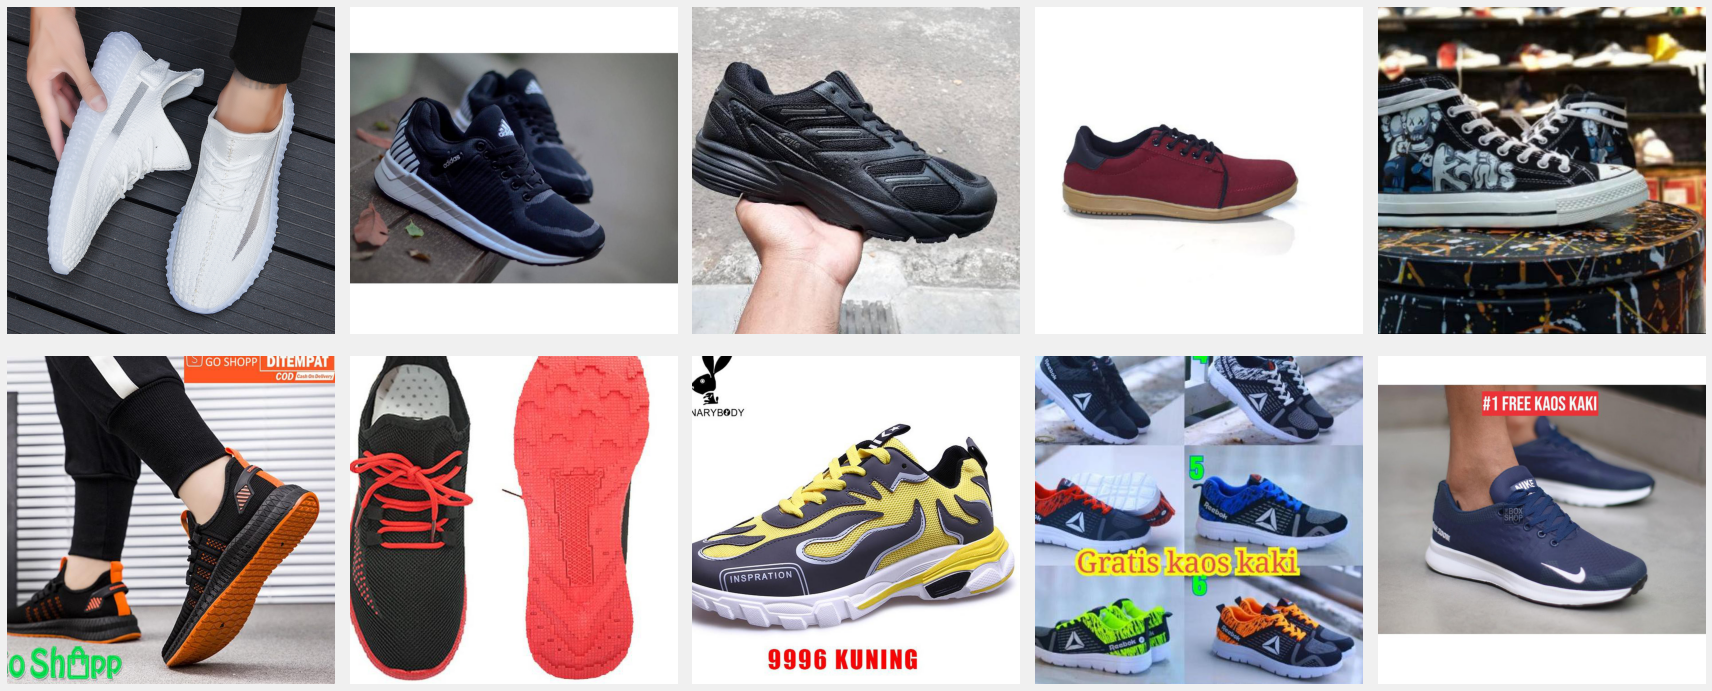

In [13]:
show_train_img("30")

In [14]:
def show_test_img():
    fig,axes = plt.subplots(nrows=2, ncols=5, figsize=(24,10))
    test_path = "C:\\Users\\Faris\\Documents\\prodDetectionShopee\\test\\test"
    ten_random_samples = pd.Series(os.listdir(test_path)).sample(10).values
    
    for idx,image in enumerate(ten_random_samples):
        final_path = os.path.join(test_path,image)
        img = cv2.imread(final_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        axes.ravel()[idx].imshow(img)
        axes.ravel()[idx].axis('off')
    plt.tight_layout()

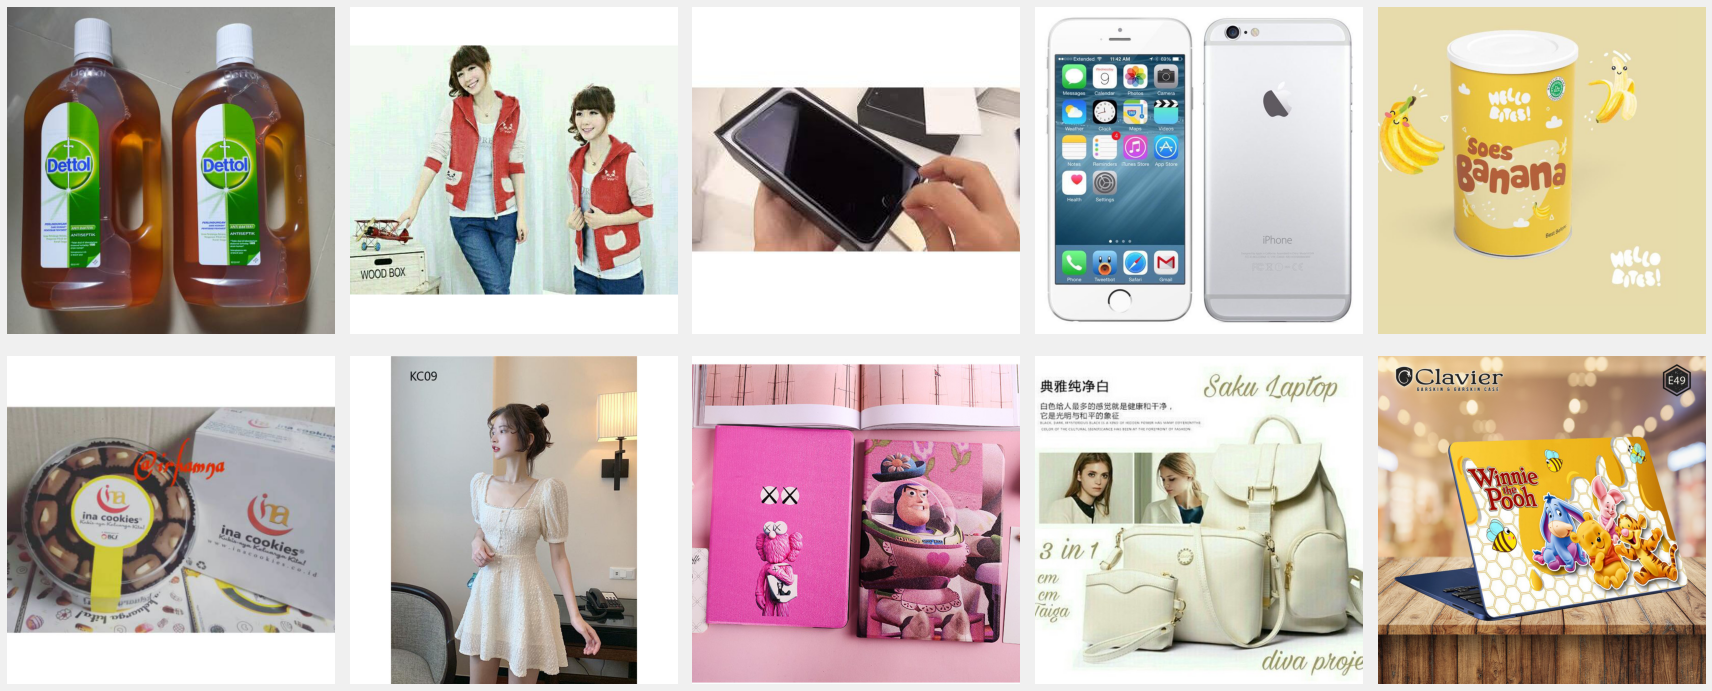

In [16]:
show_test_img()

In [17]:
dataset_path = {}

categories = np.sort(train_df['category'].unique())

for cat in categories:
    try:
        dataset_path[cat] = train_df[train_df['category'] == cat]['filename'].sample(2200)
    except:
        dataset_path[cat] = train_df[train_df['category'] == cat]['filename'].sample(frac=1.)
            

In [18]:
category_list = ['00','01','02','03','04','05','06','07','08','09'
                '10','11','12','13','14','15','16','17','18','19',
                '20','21','22','23','24','25','26','27','28','29',
                '30','31','32','33','34','35','36','37','38','39',
                '40','41']

In [28]:
train_paths = []

for idx,key in enumerate(dataset_path.keys()):
    if key == idx:
        for path in dataset_path[idx]:
            train_paths.append(os.path.join(GCS_DS_PATH,'train',category_list[idx],path))
            
            

IndexError: list index out of range

In [29]:
from numpy.random import seed
import random
seed(2)
import tensorflow as tf
tf.random.set_seed(2)

import cv2
from glob import glob

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from pathlib import Path
import pandas as pd
import numpy as np

In [30]:
TRAIN_DIR = "C:\\Users\\Faris\\Documents\\prodDetectionShopee\\train\\train"
TEST_DIR = "C:\\Users\\Faris\\Documents\\prodDetectionShopee\\test\\test"
CLASSES = [folder[len(TRAIN_DIR) + 1:] for folder in glob(TRAIN_DIR+"/*")]
CLASSES.sort()

TARGET_SIZE = (64,64)
TARGET_DIMS = (64,64,3)
N_CLASSES = 42
VALIDATION_SPLIT = 0.1
BATCH_SIZE = 64

In [32]:
def plot_one_sample_of_each(base_path):
    cols = 5
    rows = int(np.ceil(len(CLASSES)/cols))
    fig = plt.figure(figsize=(16,20))
    
    for i in range(len(CLASSES)):
        cls = CLASSES[i]
        img_path = base_path + "/" + cls + "/**"
        path_contents = glob(img_path)
        
        imgs = random.sample(path_contents,1)
        
        sp = plt.subplot(rows, cols, i+1)
        plt.imshow(cv2.imread(imgs[0]))
        plt.title(cls)
        sp.axis("off")
    
    plt.show()
    return

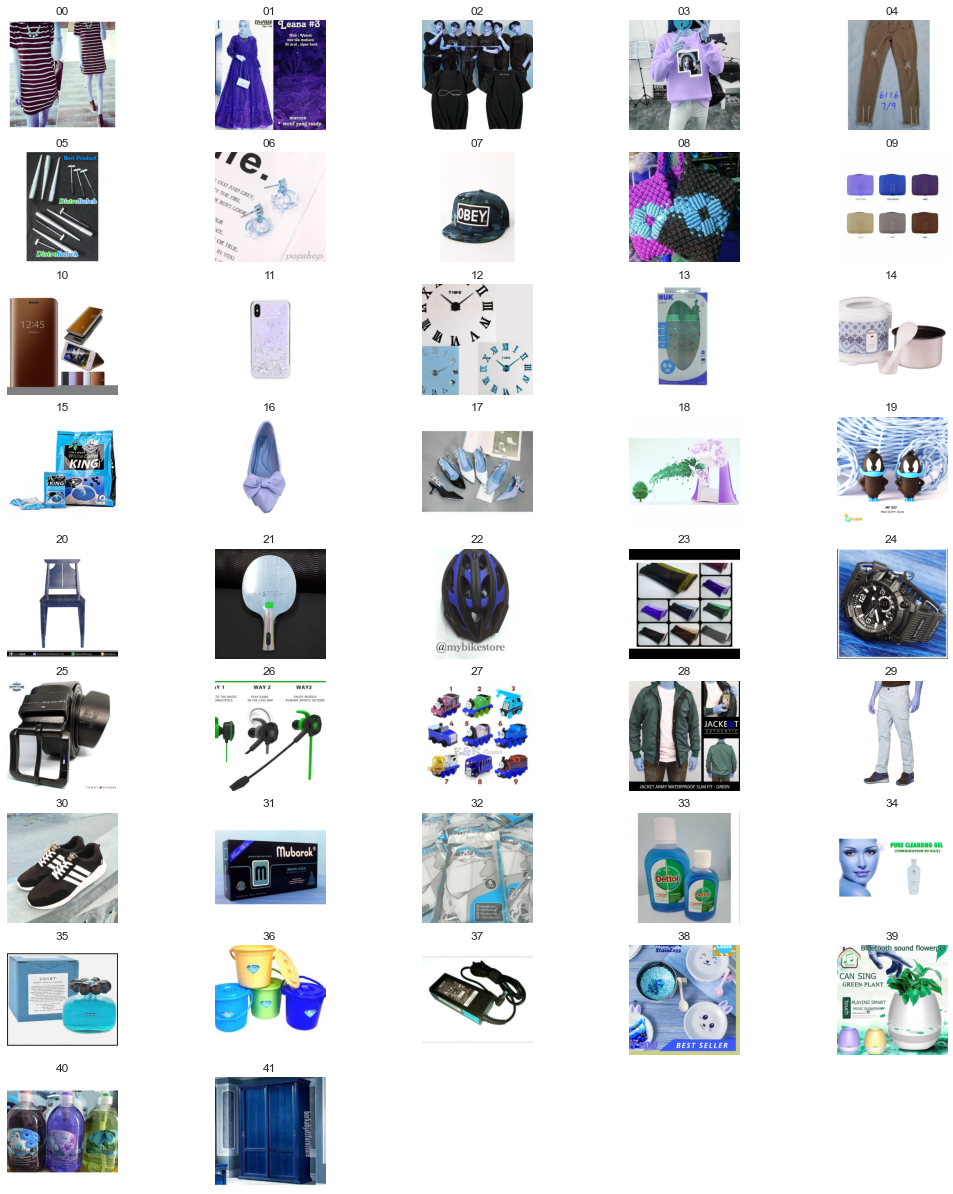

In [33]:
plot_one_sample_of_each(TRAIN_DIR)

In [34]:
each_cat = train_df.category.value_counts().sort_index()
each_cat

0     2683
1     2702
2     2687
3     2703
4     2703
5     2641
6     2641
7     2660
8     2700
9     2698
10    2672
11    1843
12    2691
13    2682
14    2684
15    2632
16    2665
17    1553
18    2103
19    2679
20    2653
21    2598
22    2623
23    2540
24    2705
25    2692
26    2684
27    2702
28    2561
29    2138
30    2705
31    2677
32    2157
33     573
34    2599
35    2658
36    2686
37    1725
38    2673
39    2678
40    2681
41    2662
Name: category, dtype: int64

In [35]:
train_df.count()

filename    105392
category    105392
dtype: int64

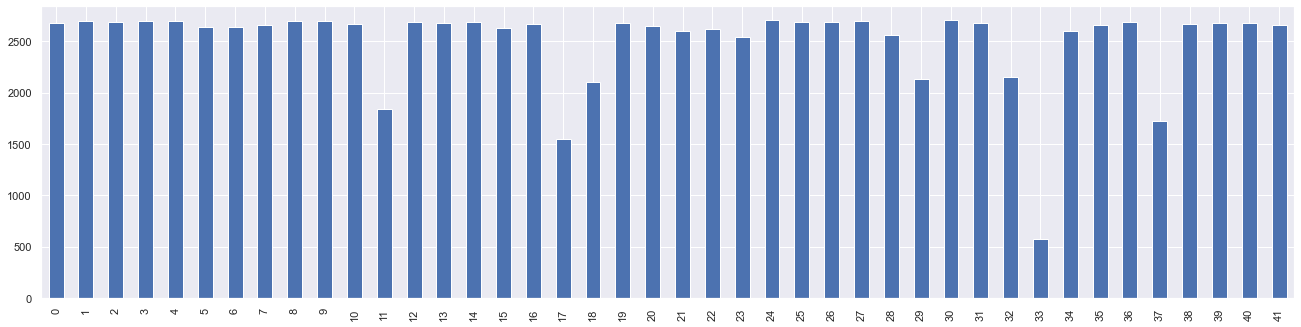

In [36]:
each_cat.plot(kind="bar", figsize=(20,5))